# Importing required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib
from tkinter import *
import tkinter as tk
from tkinter import messagebox 

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


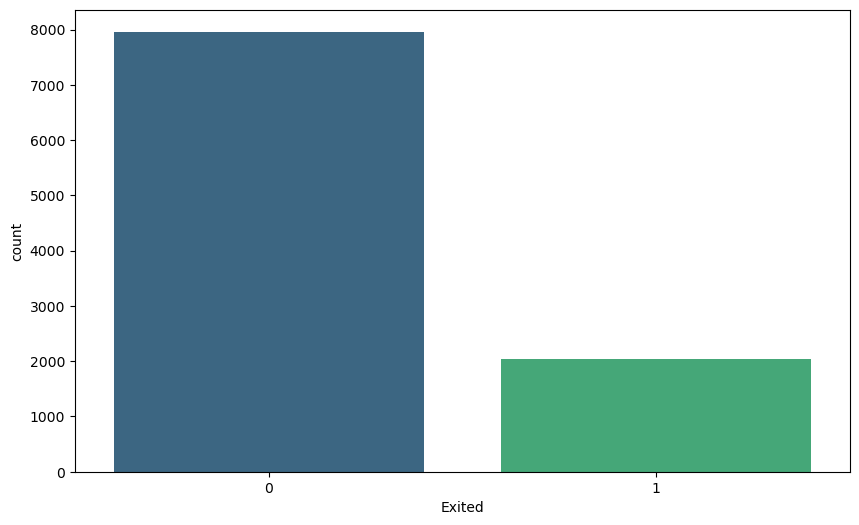

In [8]:
# Create the count plot
plt.figure(figsize=(10, 6))  # Optionally set the figure size
sns.countplot(x='Exited', data=data, palette='viridis', hue='Exited', legend=False)  # Using a different palette for clarity
plt.show()

In [9]:
A = data.drop(['Exited'],axis=1)
B = data['Exited']
A.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [10]:
A_res,B_res=SMOTE().fit_resample(A,B)
B_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [11]:
A_train,A_test,B_train,B_test=train_test_split(A_res,B_res,test_size=0.20,random_state=42,stratify=B_res)

In [12]:
sc=StandardScaler()
A_train=sc.fit_transform(A_train)
A_test = sc.transform(A_test)

## Logistic Regression

In [13]:
log = LogisticRegression()
log.fit(A_train,B_train) 

LogisticRegression()

In [14]:
B_pred1 = log.predict(A_test)

In [15]:
accuracy_score(B_test,B_pred1)

0.775894538606403

In [16]:
precision_score(B_test,B_pred1)

0.7762413576367064

In [17]:
recall_score(B_test,B_pred1)

0.7752667922159447

In [18]:
f1_score(B_test,B_pred1)

0.7757537688442211

## SVC

In [19]:
svm = svm.SVC()
svm.fit(A_train,B_train)

SVC()

In [20]:
B_pred2 = svm.predict(A_test)

In [21]:
accuracy_score(B_test,B_pred2)

0.8364720652856246

In [22]:
precision_score(B_test,B_pred2)

0.8535620052770448

In [23]:
recall_score(B_test,B_pred2)

0.8123038292529818

In [24]:
f1_score(B_test,B_pred2)

0.8324220006432936

## KNeighbors Classifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(A_train,B_train) 

KNeighborsClassifier()

In [26]:
B_pred3 = knn.predict(A_test)

In [27]:
accuracy_score(B_test,B_pred3)

0.8132454488386692

In [28]:
precision_score(B_test,B_pred3)

0.8103233830845771

In [29]:
recall_score(B_test,B_pred3)

0.8179535467671061

In [30]:
f1_score(B_test,B_pred3)

0.8141205873164636

## Decision Tree Classifier

In [31]:
dt=DecisionTreeClassifier()
dt.fit(A_train,B_train) 

DecisionTreeClassifier()

In [32]:
B_pred4 = dt.predict(A_test)

In [33]:
accuracy_score(B_test,B_pred4)

0.7972379158819837

In [34]:
precision_score(B_test,B_pred4)

0.7950155763239876

In [35]:
recall_score(B_test,B_pred4)

0.8010043942247332

In [36]:
f1_score(B_test,B_pred4)

0.7979987492182614

## Random Forest Classifier

In [37]:
rf = RandomForestClassifier()
rf.fit(A_train,B_train)

RandomForestClassifier()

In [38]:
B_pred5 = rf.predict(A_test)

In [39]:
accuracy_score(B_test,B_pred5)

0.8565599497802887

In [40]:
precision_score(B_test,B_pred5)

0.8641025641025641

In [41]:
recall_score(B_test,B_pred5)

0.8462021343377275

In [42]:
f1_score(B_test,B_pred5)

0.8550586742784649

## Gradient Boosting Classifier

In [43]:
gbc = GradientBoostingClassifier()
gbc.fit(A_train,B_train)

GradientBoostingClassifier()

In [44]:
B_pred6 = gbc.predict(A_test)

In [45]:
accuracy_score(B_test,B_pred6)

0.8411801632140615

In [46]:
precision_score(B_test,B_pred6)

0.849967804249839

In [47]:
recall_score(B_test,B_pred6)

0.8286252354048964

In [48]:
f1_score(B_test,B_pred6)

0.8391608391608392

In [49]:
final_data=pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF','GBC'],
'Accuracy': [accuracy_score(B_test,B_pred1), accuracy_score(B_test,B_pred2), accuracy_score(B_test,B_pred3), accuracy_score(B_test,B_pred4), accuracy_score(B_test,B_pred5), accuracy_score(B_test,B_pred6)]})

In [50]:
final_data

,Models,Accuracy
0,LR,0.775895
1,SVC,0.836472
2,KNN,0.813245
3,DT,0.797238
4,RF,0.856560
5,GBC,0.841180


<Axes: xlabel='Models', ylabel='Accuracy'>

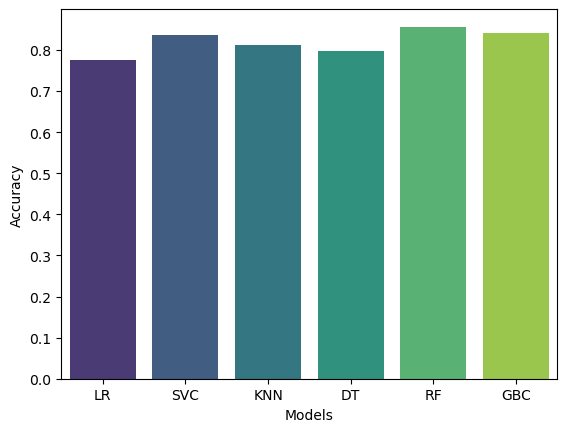

In [51]:
sns.barplot(x='Models', y='Accuracy', data=final_data, palette='viridis', hue='Models', legend=False)

In [52]:
final_data=pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF','GBC'],
'Precision': [precision_score(B_test,B_pred1), precision_score(B_test,B_pred2), precision_score(B_test,B_pred3), precision_score(B_test,B_pred4), precision_score(B_test,B_pred5), precision_score(B_test,B_pred6)]})

In [53]:
final_data

,Models,Precision
0,LR,0.776241
1,SVC,0.853562
2,KNN,0.810323
3,DT,0.795016
4,RF,0.864103
5,GBC,0.849968


<Axes: xlabel='Models', ylabel='Precision'>

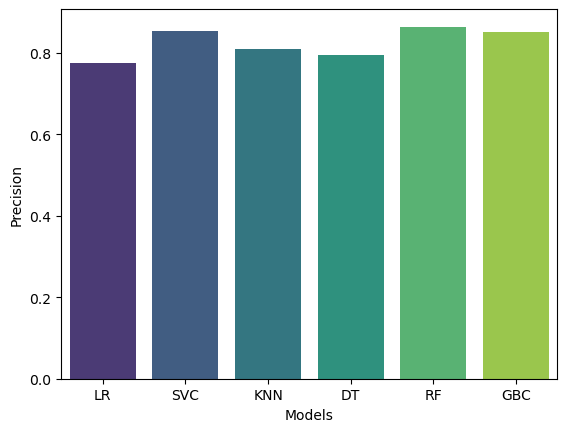

In [54]:
sns.barplot(x='Models', y='Precision', data=final_data, palette='viridis', hue='Models', legend=False)

# Final Model

In [55]:
rf = RandomForestClassifier()
rf.fit(A_res,B_res)

RandomForestClassifier()

In [56]:
joblib.dump(rf,'churn_prediction_model')

['churn_prediction_model']

In [57]:
model = joblib.load('churn_prediction_model')

# GUI

In [58]:
def map_geography(value):
    if value == 'Germany':
        return [0, 1, 0]
    elif value == 'Spain':
        return [0, 0, 1]
    elif value == 'France':
        return [1, 0, 0]
    else:
        messagebox.showerror("Error", str(e)) 

def show_entry_fields():
    try:
        credit_score = int(e1.get())
        age = int(e2.get())
        tenure = int(e3.get())
        balance = float(e4.get())
        num_of_products = int(e5.get())
        has_cr_card = int(e6.get())
        is_active_member = int(e7.get())
        estimated_salary = float(e8.get())
        geography = map_geography(e9.get())
        gender_male = int(e10.get())

        input_data = pd.DataFrame([[
            credit_score, age, tenure, balance, num_of_products,
            has_cr_card, is_active_member, estimated_salary, geography[1], geography[2], gender_male
        ]], columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                     'IsActiveMember', 'EstimatedSalary',
                     'Geography_Germany', 'Geography_Spain', 'Gender_Male'])

        result = model.predict(input_data)
        
        messagebox.showinfo("Prediction", f"The prediction result is: {'Exited' if result[0] == 1 else 'Not Exited'}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

master = tk.Tk()
master.title("Churn Prediction")

labels = ["Credit Score", "Age", "Tenure", "Balance", "Number of Products",
          "Has Credit Card (1: Yes, 0: No)", "Is Active Member (1: Yes, 0: No)",
          "Estimated Salary", "Geography (France/Germany/Spain)",
          "Gender (1: Male, 0: Female)"]

entries = []
for i, label in enumerate(labels, 1):
    tk.Label(master, text=label).grid(row=i, column=0)
    entry = tk.Entry(master)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Assign entries to variables
e1, e2, e3, e4, e5, e6, e7, e8, e9, e10 = entries

# Prediction button
tk.Button(master, text='Predict', command=show_entry_fields).grid(row=len(labels)+1, column=1, pady=10)

# Start the main loop
master.mainloop()
